## Comparing Maximal Information Coefficient to Pearson, Spearman, Cosine Similarity on bivariate data

#### Author: Rhondene Wint


<h3> Introduction</h3>

This short notebook is written as a follow-up to my previous <a href='https://rhondenewint.wordpress.com/2018/12/09/maximal-information-coefficient-a-modern-approach-for-finding-associations-in-large-data-sets' > article </a > discussing maximal information coefficient, MIC. I will compare the association metrics listed in the title above on simulated data representing several types of association.

<h4> Objectives </h4>
The code below will include the following:
- simulating data and relationships with and without noise
- Comparing performance of MIC, Pearson, Spearman and Cosine similarity
- Visualising the results

In [ ]:
## install minepy, 
!pip install minepy

In [1]:
##import all our useful packages

import numpy as np
import scipy.stats as stats
import pandas as pd

import matplotlib.pyplot as plt
import seaborn

from minepy import MINE
from scipy.spatial import distance
import math

In [2]:
##set random number generator seed for reproducibility
np.random.seed(123) 

### Write reusable function for computing the different association measures

In [3]:
#initialise mine alogithm with default parameters
mine = MINE(alpha=0.6, c=15) 

##write function to compare these variables and give association metric for each
def compare_stats(x,y):
    """ Input:
    x,y: vector of numbers
    Output:
    results: a pandas series with score for each metric"""
    
    results= dict()
    
    results['Pearson\'s R']=stats.pearsonr(x,y)[0] #returns both Pearson's coefficient and p-value, keep the first value which is the R coefficient
    results['Spearman'] = stats.spearmanr(x,y) [0]
    mine.compute_score(x,y) 
    results['MIC'] = mine.mic() 
    results['Cosine Similarity']= 1-distance.cosine(x,y)  
    return pd.Series(results)

<i>I substracted the cosine distancefrom 1, because it a distance metric. The farther the distance more dissimilar, inversely the smaller the distance the more correlated are two variables.</i>

### Linear Relationship

In [4]:
"""generate linear relationship:  y =  b + ax+ error"""
#generate vector x of 100 evenly spaced values between 0 and 10
x = np.linspace(0,10,100) 

#generate y as linear function of x without
y1 = 2.0+0.7*x

#generates random error values sampled a from normal distribution
noise = np.random.randn(100) 

#generate y as linear function of x with noise
y2 = 2.+0.7*x+noise

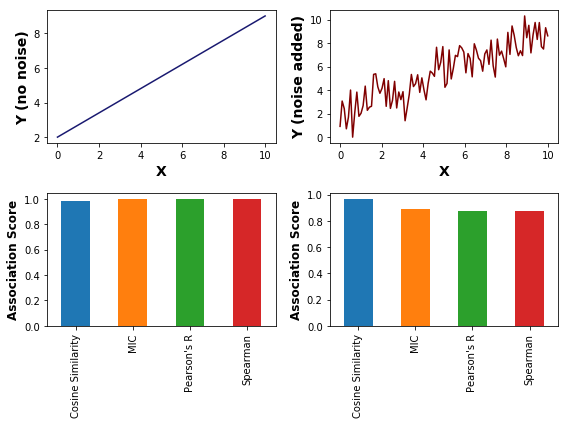

In [6]:
fig,axes=plt.subplots(2,2, sharex=False, sharey=False, figsize=(8,6)) #makes a 2x2 grid, one for each plot
axes[0,0].plot(x,y1, color='midnightblue')
axes[0,1].plot(x,y2, color = 'maroon')
axes[0,0].set_ylabel('Y (no noise)', fontweight='bold', fontsize=14)
axes[0,1].set_ylabel('Y (noise added)', fontweight='bold', fontsize=14); 
axes[0,0].set_xlabel('X',fontweight='bold', fontsize=14); 
axes[0,1].set_xlabel('X',fontweight='bold', fontsize=14)

#compute the different association metrics 
no_noise = compare_stats(x,y1)
with_noise = compare_stats(x,y2)

#plot the results to compare performance 
no_noise.plot.bar(ax=axes[1,0])
axes[1,0].set_ylabel('Association Score', fontweight='bold',fontsize=12)
with_noise.plot.bar(ax=axes[1,1])
axes[1,1].set_ylabel('Association Score', fontweight='bold',fontsize=12)

plt.tight_layout()
plt.show()

In [8]:
""" here is what the results look like """

print('Perfect Linear Relationship \n \n',no_noise)
print('\n Noisy Linear Relationship \n \n', with_noise)

Perfect Linear Relationship 
 
 Cosine Similarity    0.985142
MIC                  1.000000
Pearson's R          1.000000
Spearman             1.000000
dtype: float64

 Noisy Linear Relationship 
 
 Cosine Similarity    0.967530
MIC                  0.890657
Pearson's R          0.876010
Spearman             0.877144
dtype: float64


<b> Comment</b>: Expectedly, all the metrics performed perfectly on the noiseless data. However, Cosine similarity was most robust to noise when it.      
<b> Winner: Cosine Similarity</b>

### Random relationship

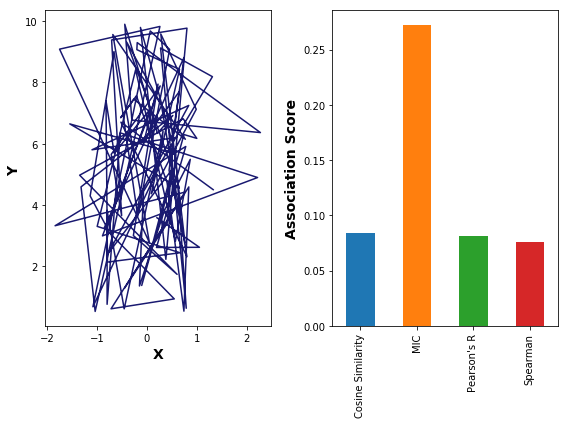

In [16]:
#generate vector x of 100 evenly spaced values between 0 and 10
x = np.random.randn(100) 
#generate y randomly
y = np.random.uniform(0.5,10,100) 

#computes association scores between x and y
results=compare_stats(x,y)

## Visualise relationship with line plots

fig,axes=plt.subplots(1,2, sharex=False, sharey=False, figsize=(8,6))

axes[0].plot(x,y, color='midnightblue')
axes[0].set_xlabel('X',fontweight='bold', fontsize=14); 
axes[0].set_ylabel('Y ', fontweight='bold', fontsize=14)

axes[1]=results.plot.bar()
axes[1].set_ylabel('Association Score', fontweight='bold', fontsize=14); 

plt.tight_layout()
plt.show()

In [17]:
results

Cosine Similarity    0.084432
MIC                  0.272303
Pearson's R          0.081491
Spearman             0.075716
dtype: float64

<b> Comment</b>: While the other metrics appropiately deteceted that this was a random relationship, I am concerned about MIC's score of 0.27 which users may interpret as a weak relationship. <b> Loser: MIC</b>

## Quadriatic/Polynomial Relationship

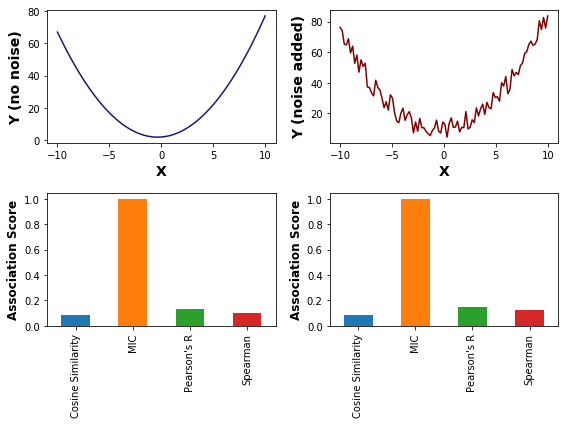

In [19]:
#generate vector x of 100 evenly spaced values between 0 and 10
x = np.linspace(-10,10,100) 
#generate y as  function of x without
y1 = 2.0+0.7*x**2 + 0.5*x
#generates 100 random error values between 0.5 and 0.8 sampled a from uniform distribution
noise = np.random.uniform(0.5,15, 100) 
#generate y as  function of x with noise
y2 = 2.+ 0.7*x**2+ 0.5*x + noise


#compute the different association metrics 
no_noise = compare_stats(x,y1)
with_noise = compare_stats(x,y2)


## Visualise the results

fig,axes=plt.subplots(2,2, sharex=False, sharey=False, figsize=(8,6)) #makes a 2x2 grid, one for each plot
axes[0,0].plot(x,y1, color='midnightblue')
axes[0,1].plot(x,y2, color = 'maroon')
axes[0,0].set_ylabel('Y (no noise)', fontweight='bold', fontsize=14)
axes[0,1].set_ylabel('Y (noise added)', fontweight='bold', fontsize=14); 
axes[0,0].set_xlabel('X',fontweight='bold', fontsize=14); 
axes[0,1].set_xlabel('X',fontweight='bold', fontsize=14)

#plot the results to compare performance 
no_noise.plot.bar(ax=axes[1,0])
axes[1,0].set_ylabel('Association Score', fontweight='bold',fontsize=12)
with_noise.plot.bar(ax=axes[1,1])
axes[1,1].set_ylabel('Association Score', fontweight='bold',fontsize=12)

plt.tight_layout()
plt.show()

In [20]:
print('Noiseless Relationship \n \n',no_noise)
print('\n Noisy Relationship \n \n', with_noise)

Noiseless Relationship 
 
 Cosine Similarity    0.086832
MIC                  1.000000
Pearson's R          0.135698
Spearman             0.101446
dtype: float64

 Noisy Relationship 
 
 Cosine Similarity    0.081338
MIC                  1.000000
Pearson's R          0.147935
Spearman             0.122424
dtype: float64


<b> Comment</b>: MIC greatly outperformed all the other metrics on detecting this non-linear relationship. Also note how robust MIC was when noise was added.
<b> Winner: MIC </b>

## Sinusoidal relationship

 - For example, the concentration of a cell cyle protein 

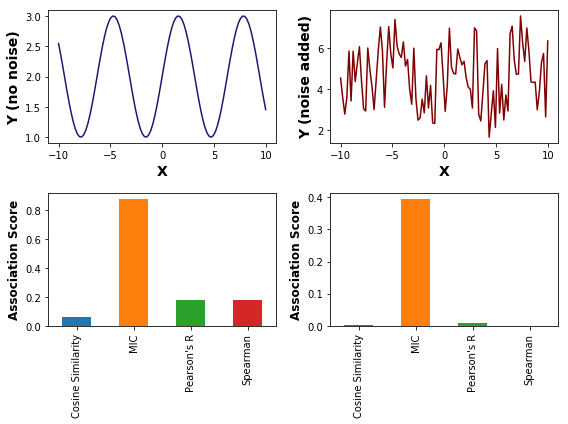

In [21]:
#generate vector x of 100 evenly spaced values between -10 and 10
x = np.linspace(-10,10,100) 
#generate y as sine function of x without
y1 = 2.0+np.sin(x)
#generates 100 random error values between 0.5 and 0.8 sampled a from uniform distribution
noise = np.random.uniform(0.5,5, 100) 
#generate y as sine function of x with noise
y2 = 2.+ np.sin(x) + noise

#compute the different association metrics 
no_noise = compare_stats(x,y1)
with_noise = compare_stats(x,y2)


## Visualise the results

fig,axes=plt.subplots(2,2, sharex=False, sharey=False, figsize=(8,6)) #makes a 2x2 grid, one for each plot
axes[0,0].plot(x,y1, color='midnightblue')
axes[0,1].plot(x,y2, color = 'maroon')
axes[0,0].set_ylabel('Y (no noise)', fontweight='bold', fontsize=14)
axes[0,1].set_ylabel('Y (noise added)', fontweight='bold', fontsize=14); 
axes[0,0].set_xlabel('X',fontweight='bold', fontsize=14); 
axes[0,1].set_xlabel('X',fontweight='bold', fontsize=14)

#plot the results to compare performance 
no_noise.plot.bar(ax=axes[1,0])
axes[1,0].set_ylabel('Association Score', fontweight='bold',fontsize=12)
with_noise.plot.bar(ax=axes[1,1])
axes[1,1].set_ylabel('Association Score', fontweight='bold',fontsize=12)

plt.tight_layout()
plt.show()

In [22]:
print('Noiseless Relationship \n \n',no_noise)
print('\n Noisy Relationship \n \n', with_noise)

Noiseless Relationship 
 
 Cosine Similarity    0.058313
MIC                  0.880443
Pearson's R          0.178871
Spearman             0.181638
dtype: float64

 Noisy Relationship 
 
 Cosine Similarity    0.002390
MIC                  0.395266
Pearson's R          0.008159
Spearman             0.000324
dtype: float64


<b> Comment</b>: Again, MIC outperformed all others on detecting non-linear relationships, and it's score was the most resistant to noise, based on the scores before and after.